In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
#Importing the test Dataset
dataset_full_test = pd.read_csv('azure_wq_test_entire_dataset.csv')
dataset_full_test = dataset_full_test[['datetime','temp', 'cond', 'do', 'turb', 'chl-a']]
dataset_full_test.sort_index()
print(dataset_full_test.shape)
dataset_full_test.tail()

(1703, 6)


,datetime,temp,cond,do,turb,chl-a
1698,2019-10-07 09:28:57,28.85450,114.8247,4.183043,233.6058,756.1524
1699,2019-10-07 09:43:57,28.86032,114.9700,4.145543,162.0830,700.5317
1700,2019-10-07 12:13:57,28.91764,114.6542,4.948326,198.8478,705.6551
1701,2019-10-07 12:43:57,28.95679,115.1583,5.223165,205.1799,707.6824
1702,2019-10-08 14:44:46,28.89604,115.3140,6.730115,239.6638,1059.8350


In [15]:
#TEST FOR JSON #FOR AWS IOT CORE
import json

for index, row in dataset_full_test.iterrows():
    a = { "datetime" : row['datetime'],
         "temp" : row['temp'],
         "cond" : row['cond'],
         "do":  row['do'],
         "turb": row['turb']

    }

    # conversion to JSON done by dumps() function
    b = json.dumps(a)
    print(b)

{"datetime": "2019-02-20 12:00:00", "temp": 29.55674, "cond": 92.12651, "do": 6.491213, "turb": 32.86783}
{"datetime": "2019-02-20 12:10:00", "temp": 29.59175, "cond": 92.22813, "do": 6.724226, "turb": 24.304920000000006}
{"datetime": "2019-02-20 12:20:00", "temp": 29.57693, "cond": 91.93182, "do": 6.6773570000000015, "turb": 47.46174}
{"datetime": "2019-02-20 12:40:00", "temp": 29.64378, "cond": 92.78736, "do": 7.6294309999999985, "turb": 26.5817}
{"datetime": "2019-02-20 14:40:00", "temp": 29.67038, "cond": 91.74003, "do": 8.935707, "turb": 40.49232}
{"datetime": "2019-02-20 16:10:00", "temp": 29.77673, "cond": 93.55465, "do": 10.54057, "turb": 38.54684}
{"datetime": "2019-02-20 18:30:00", "temp": 29.75532, "cond": 92.54897, "do": 9.730732, "turb": 72.77338}
{"datetime": "2019-02-20 18:50:00", "temp": 29.67714, "cond": 92.23919, "do": 8.159566, "turb": 40.00311}
{"datetime": "2019-02-20 19:50:00", "temp": 29.80825, "cond": 93.56911, "do": 9.01524, "turb": 58.92992}
{"datetime": "2019

{"datetime": "2019-03-18 00:13:33", "temp": 30.82846, "cond": 95.11102, "do": 8.124392, "turb": 246.8387}
{"datetime": "2019-03-18 01:23:33", "temp": 30.86681, "cond": 94.88711, "do": 8.219081, "turb": 262.6832}
{"datetime": "2019-03-18 03:43:33", "temp": 30.90985, "cond": 94.08221, "do": 10.4718, "turb": 265.2693}
{"datetime": "2019-03-18 06:23:33", "temp": 30.75578, "cond": 94.09789, "do": 11.69443, "turb": 240.2602}
{"datetime": "2019-03-18 06:43:33", "temp": 30.717440000000003, "cond": 94.40099, "do": 10.91231, "turb": 238.2767}
{"datetime": "2019-03-18 07:03:33", "temp": 30.67717, "cond": 93.85834, "do": 11.29918, "turb": 234.6892}
{"datetime": "2019-03-18 07:13:33", "temp": 30.64879, "cond": 93.78932, "do": 10.01443, "turb": 235.9116}
{"datetime": "2019-03-18 08:23:33", "temp": 30.55102, "cond": 93.96317, "do": 8.759995, "turb": 239.5945}
{"datetime": "2019-03-18 08:43:33", "temp": 30.50263, "cond": 93.89343, "do": 7.899394999999998, "turb": 243.7074}
{"datetime": "2019-03-18 10:

{"datetime": "2019-09-26 01:02:00", "temp": 29.41272, "cond": 112.6373, "do": 4.538191, "turb": 112.1181}
{"datetime": "2019-09-26 01:32:00", "temp": 29.38192, "cond": 112.6907, "do": 4.5781410000000005, "turb": 103.3373}
{"datetime": "2019-09-26 02:17:00", "temp": 29.34481, "cond": 112.8202, "do": 4.209876, "turb": 106.617}
{"datetime": "2019-09-26 03:02:00", "temp": 29.31442, "cond": 112.8506, "do": 3.858516, "turb": 100.6047}
{"datetime": "2019-09-26 04:02:00", "temp": 29.28439, "cond": 113.1023, "do": 3.428872, "turb": 101.3773}
{"datetime": "2019-09-26 05:02:00", "temp": 29.25241, "cond": 112.9032, "do": 3.200397, "turb": 91.27069}
{"datetime": "2019-09-26 06:47:00", "temp": 29.17983, "cond": 113.0067, "do": 2.5735330000000003, "turb": 89.76283000000002}
{"datetime": "2019-09-26 07:17:00", "temp": 29.16361, "cond": 113.2348, "do": 2.594417, "turb": 88.43333}
{"datetime": "2019-09-26 07:32:00", "temp": 29.16015, "cond": 113.2321, "do": 2.342972, "turb": 104.8166}
{"datetime": "2019

In [12]:
len(dataset_full_test)

AttributeError: 'int' object has no attribute 'type'

In [3]:
#Preparing Input & Output Features
X = dataset_full_test[:]
Y = X.pop('chl-a')
print(X.shape)
print(Y.shape)
Y.head()

(1703, 5)
(1703,)


0    39.64875
1    40.57396
2    40.88269
3    47.05107
4    59.39921
Name: chl-a, dtype: float64

# LightGBM

In [6]:
#if fails, use the yml file to update the environment using  'conda env update --file local.yml --prune'
# then install cloudpickle using 'conda install -c conda-forge/label/cf202003 cloudpickle'
#Loading the model
filename = 'lgbm_model.pkl'
entire_ds_model = pickle.load(open(filename, 'rb'))

In [7]:
#Testing the model on test dataset
result = entire_ds_model.score(X,Y)
predicted_Y = pd.DataFrame(entire_ds_model.predict(X))
print(result)
print('R2: %f' % (r2_score(Y, predicted_Y)))
print('MAE: %f' % (mean_absolute_error(Y, predicted_Y)))
print('MAE: %f' % (mean_squared_error(Y, predicted_Y, squared=False))) 



0.9890946296486066
R2: 0.989095
MAE: 13.898911
MAE: 26.618131


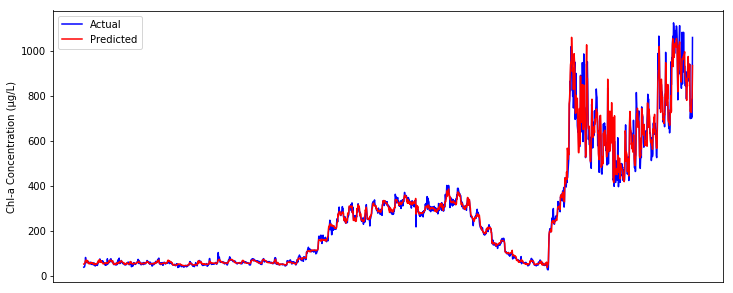

In [8]:
plt.figure(figsize=(12,5))
plt.ylabel('Chl-a Concentration (µg/L)')
plt.plot(Y, color='blue', label = 'Actual')
plt.plot(predicted_Y, color='red', label = 'Predicted')
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.legend()
plt.show()

# RF

In [9]:
#Loading the model
filename = 'rf_model.pkl'
entire_ds_model = pickle.load(open(filename, 'rb'))

In [10]:
#Testing the model on test dataset
result = entire_ds_model.score(X,Y)
predicted_Y = pd.DataFrame(entire_ds_model.predict(X))
print(result)
print('R2: %f' % (r2_score(Y, predicted_Y)))
print('MAE: %f' % (mean_absolute_error(Y, predicted_Y)))
print('MAE: %f' % (mean_squared_error(Y, predicted_Y, squared=False))) 



0.9796036978980968
R2: 0.979604
MAE: 17.491467
MAE: 36.402656


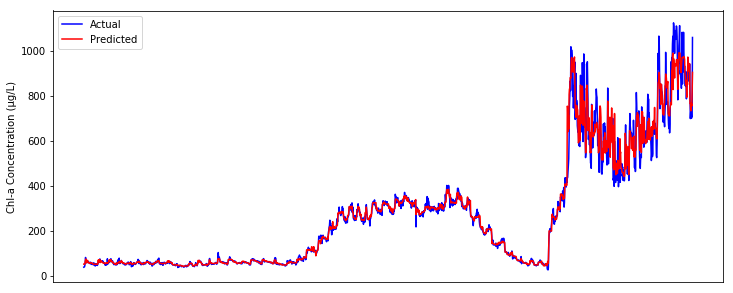

In [11]:
plt.figure(figsize=(12,5))

plt.ylabel('Chl-a Concentration (µg/L)')

plt.plot(Y, color='blue', label = 'Actual')

plt.plot(predicted_Y, color='red', label = 'Predicted')

ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.legend()
plt.show()

# XGBoost

In [12]:
#Loading the model
filename = 'xgboost_model.pkl'
entire_ds_model = pickle.load(open(filename, 'rb'))

In [13]:
#Testing the model on test dataset
result = entire_ds_model.score(X,Y)
predicted_Y = pd.DataFrame(entire_ds_model.predict(X))
print(result)
print('R2: %f' % (r2_score(Y, predicted_Y)))
print('MAE: %f' % (mean_absolute_error(Y, predicted_Y)))
print('MAE: %f' % (mean_squared_error(Y, predicted_Y, squared=False))) 



0.9776201998861915
R2: 0.977620
MAE: 20.841458
MAE: 38.131637


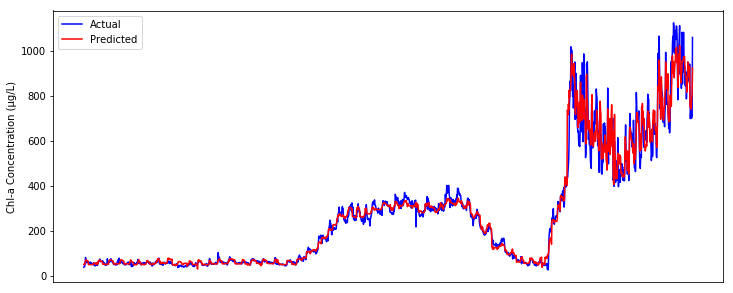

In [14]:
plt.figure(figsize=(12,5))

plt.ylabel('Chl-a Concentration (µg/L)')

plt.plot(Y, color='blue', label = 'Actual')

plt.plot(predicted_Y, color='red', label = 'Predicted')

ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.legend()
plt.show()